In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\projects  data analysis\Sales Project\Sales Data.csv", encoding='latin1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# 1- Drop Tow columns has null values
df.drop(['Status','unnamed1'] ,axis = 1 , inplace = True)

In [6]:
df.dropna(inplace = True)

In [7]:
#check For null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [8]:
# Change data Type form float to int
df['Amount'] = df['Amount'].astype('int')

In [9]:
#Replace 1 and 0 with married and single
mapping = {1:'Married',0:'Single'}

df['Marital_Status'] = df['Marital_Status'].replace(mapping)

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


In [11]:
df[['Age']].describe()

,Age
count,11239.000000
mean,35.410357
std,12.753866
min,12.000000
25%,27.000000
50%,33.000000
75%,43.000000
max,92.000000


In [13]:
#Replace F and M with Male and female
mapping = {'F':'Female','M':'Male'}

df['Gender'] = df['Gender'].replace(mapping)

In [16]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


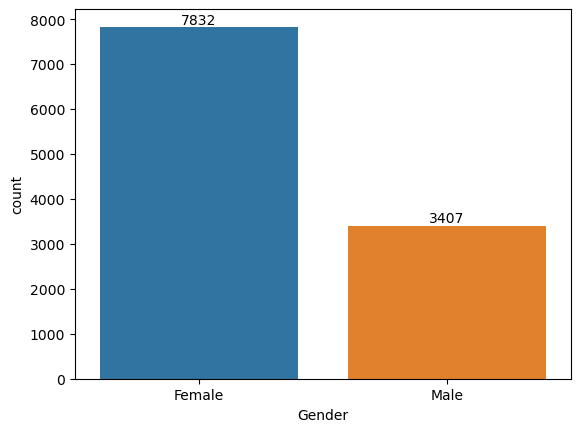

In [19]:
# Exploratory Data Analysis
# Gender
ax = sns.countplot(x='Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

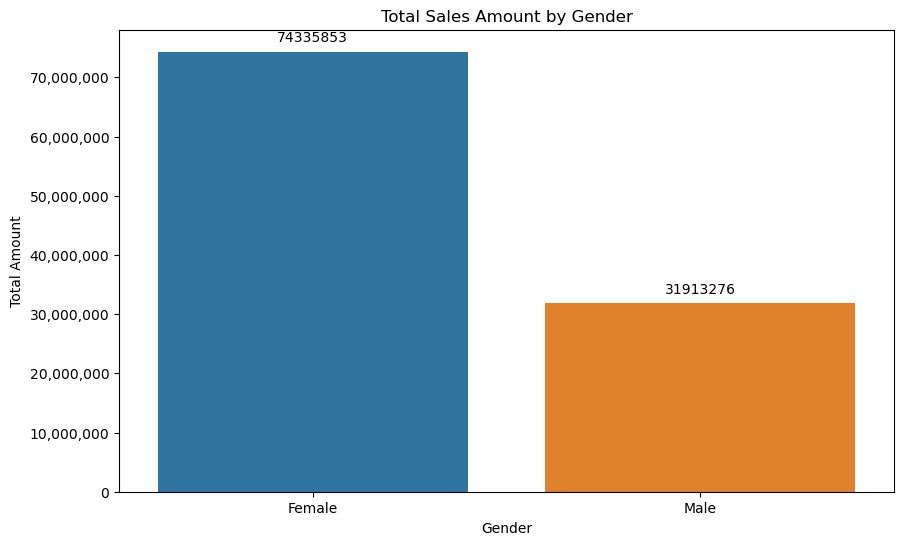

In [28]:
plt.figure(figsize=(10, 6))
# to get total amount   for each others
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)]

# Create the barplot
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen)

# Add total amount labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Set y-axis to display integer values
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Total Sales Amount by Gender')

# Show the plot
plt.show()

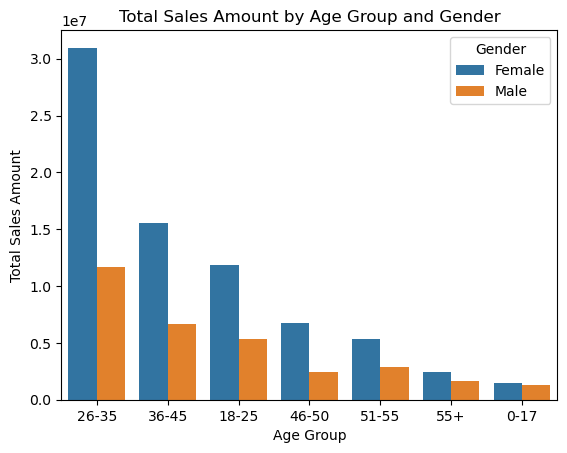

In [44]:

# Sales by Age Group and gender
sales_Age = df.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Create the barplot with hue as 'Gender'
ax = sns.barplot(x='Age Group', y='Amount', hue='Gender', data=sales_Age)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Age Group and Gender')

# Show the plot
plt.show()

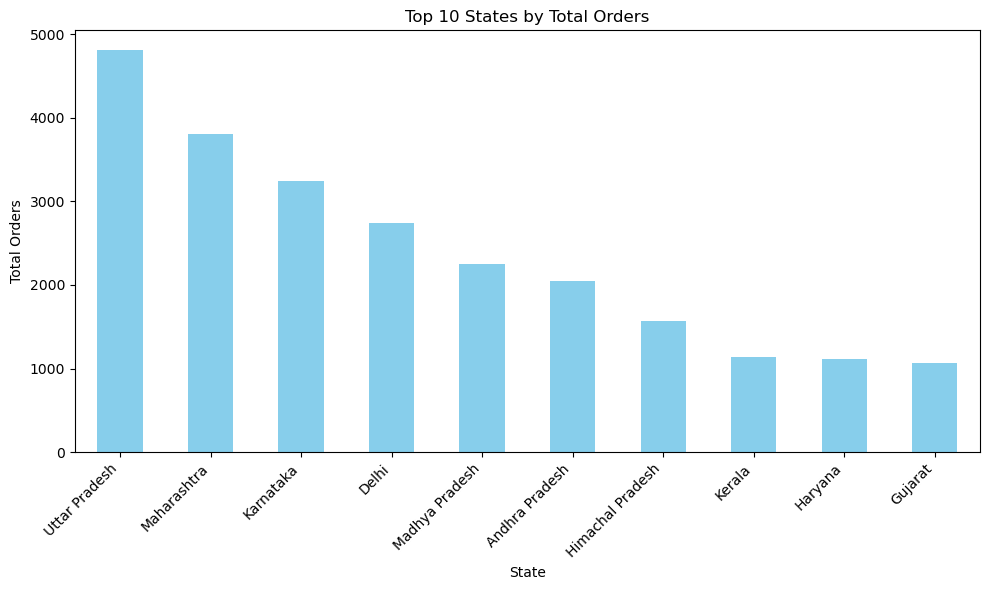

In [45]:
# Group the data by state and sum the orders
orders_by_state = df.groupby('State')['Orders'].sum()

# Sort the states based on total orders and select the top 10
top_10_states = orders_by_state.nlargest(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.title('Top 10 States by Total Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


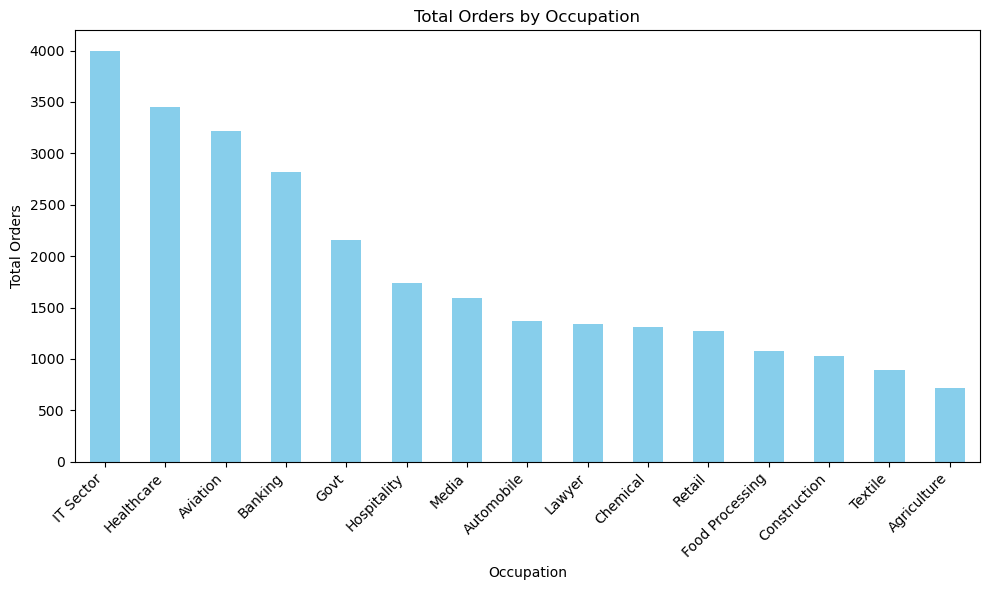

In [51]:
# Group the data by occupation and sum the orders
orders_by_occupation = df.groupby('Occupation')['Orders'].sum()

# Sort the occupations based on total orders
orders_by_occupation_sorted = orders_by_occupation.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
orders_by_occupation_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Total Orders')
plt.title('Total Orders by Occupation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


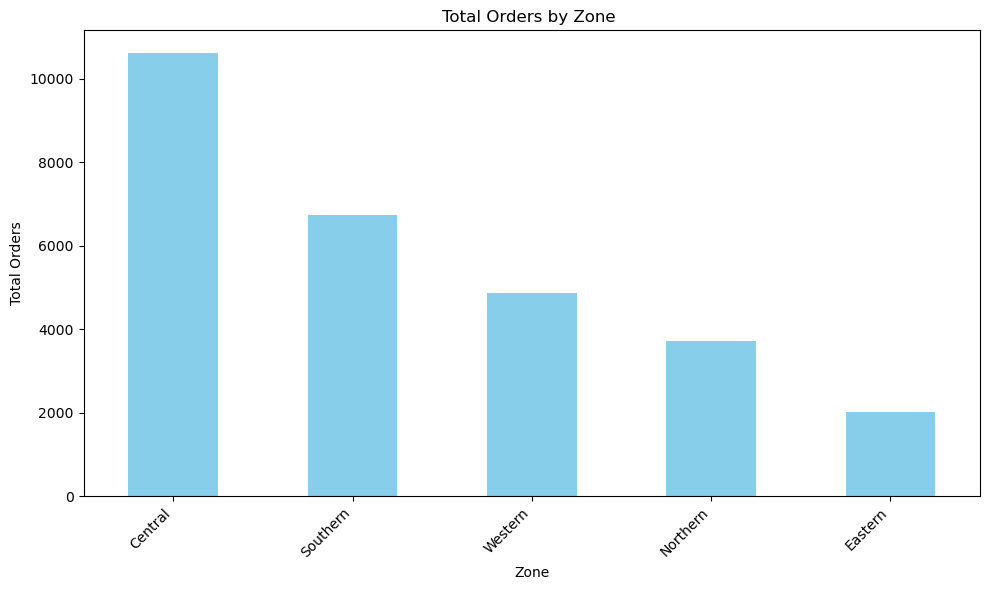

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the 'Zone' column and 'Orders' column

# Group the data by zone and sum the orders
orders_by_zone = df.groupby('Zone')['Orders'].sum()

# Sort the data by total orders in descending order
orders_by_zone_sorted = orders_by_zone.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
orders_by_zone_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Zone')
plt.ylabel('Total Orders')
plt.title('Total Orders by Zone ')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


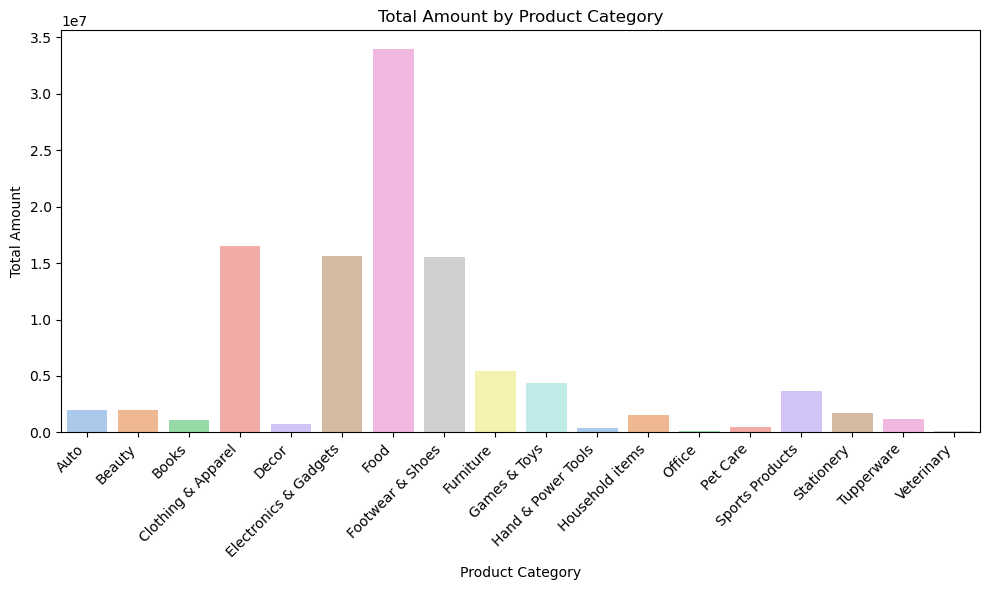

In [58]:

#Group the data by product category and sum the amounts
amounts_by_category = df.groupby('Product_Category')['Amount'].sum().reset_index()

amounts_by_category_sorted = amounts_by_category.sort_values(by='Amount', ascending=False)
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Amount', data=amounts_by_category, palette='pastel')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Product Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
